In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best


In [4]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        print("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split is not None:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [5]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        print("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split is not None:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [6]:
from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [7]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clfTree1.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)

In [8]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

(1599, 12)


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

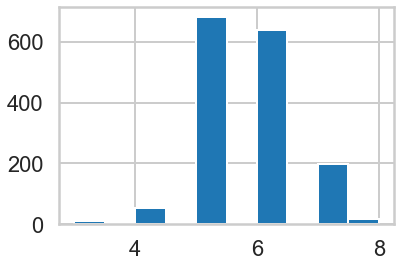

In [9]:
print(df.shape)

plt.hist(df.quality)

In [10]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [11]:
Xnames = list(df.columns.values[1:11])

In [12]:
np.mean(df['target'])

0.1357098186366479

In [13]:
# Create test/train mask
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [14]:
# make sure we didn't get unlucky in our mask selection
print("% Good wines in Training:", np.mean(df.target[mask]))
print("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.1334723670490094
% Good wines in Testing: 0.1390625


In [15]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 4, 'min_samples_leaf': 1} 0.39094319103443187 {'mean_fit_time': array([0.00165443, 0.00162611, 0.0013958 , 0.00076132, 0.00128088,
       0.0009789 , 0.00112195, 0.00146651, 0.00099831, 0.00108271,
       0.00079751, 0.00099783, 0.00089779, 0.00139627, 0.00179415,
       0.00159597, 0.00119505, 0.00095038, 0.0015955 , 0.00139651,
       0.00179501, 0.00119529, 0.00160575, 0.00099735, 0.00200381,
       0.00139651, 0.00120506, 0.00199289, 0.00119696, 0.00199471,
       0.0015996 , 0.00159564, 0.00179515, 0.0009985 , 0.00159597,
       0.00159597, 0.00159512, 0.00139565, 0.00139732, 0.00159554,
       0.00159688, 0.00158944]), 'std_fit_time': array([4.21306702e-04, 4.54820385e-04, 4.43284672e-04, 2.20843793e-04,
       3.98648315e-04, 1.74651424e-04, 4.45511215e-04, 4.19121797e-04,
       2.59164395e-06, 1.71758399e-04, 3.98755540e-04, 7.89305942e-07,
       1.30832386e-04, 5.05929654e-04, 3.98426092e-04, 4.88422022e-04,
       3.96446801e-04, 9.51533776e-05

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


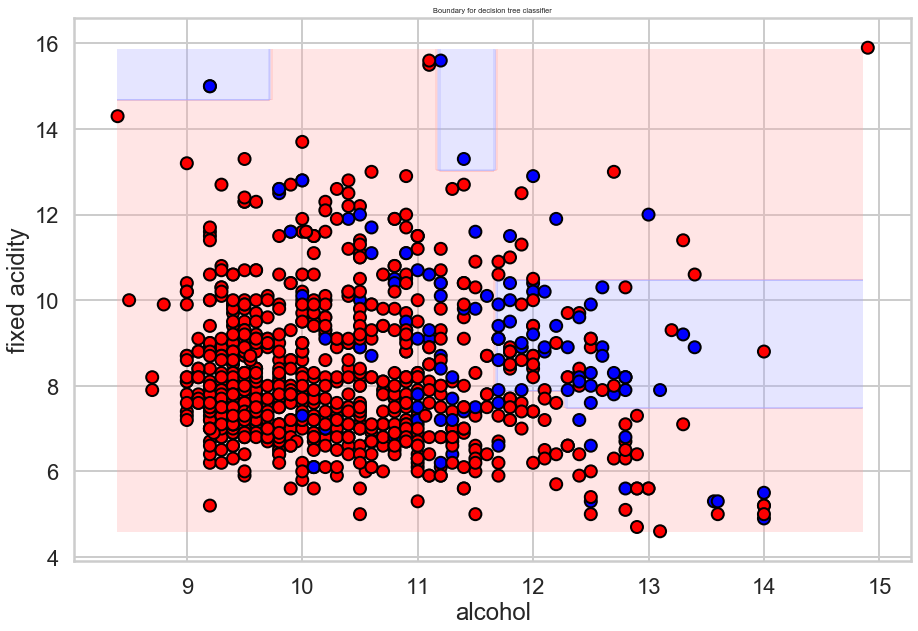

In [16]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

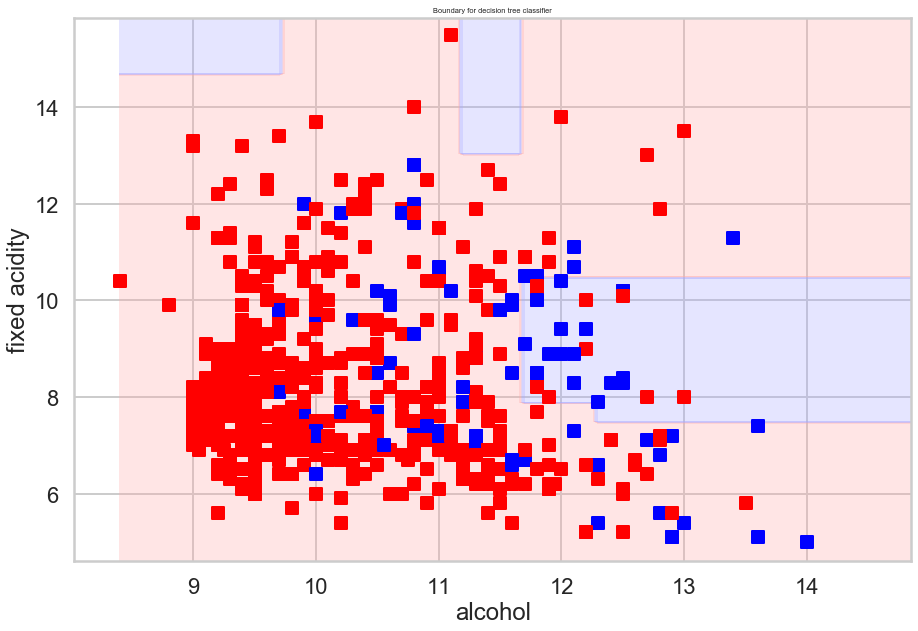

In [17]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 6} 0.30153931905846165 {'mean_fit_time': array([0.00214391, 0.00221171, 0.00176497]), 'std_fit_time': array([0.00060277, 0.00039102, 0.00077296]), 'mean_score_time': array([0.0019619 , 0.00160809, 0.00219121]), 'std_score_time': array([7.10641601e-05, 4.99148104e-04, 9.15238447e-04]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.18181818, 0.24242424, 0.19354839]), 'split1_test_score': array([0.35294118, 0.36111111, 0.28985507]), 'split2_test_score': array([0.16666667, 0.        , 0.36363636]), 'split3_test_score': a

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


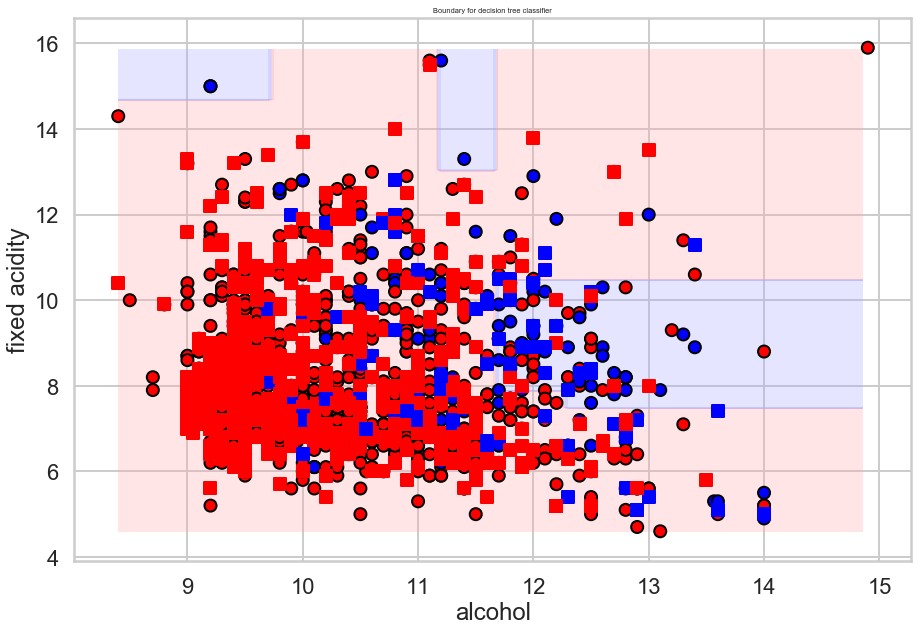

In [18]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [19]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 2, 'min_samples_leaf': 1} 0.5117587952409995 {'mean_fit_time': array([0.00276198, 0.00230484, 0.00243797, 0.00240641, 0.0028266 ,
       0.00247774, 0.00267878, 0.00165825, 0.0028029 , 0.00232296,
       0.00363827, 0.00472865, 0.00385528, 0.00447063, 0.00348945,
       0.00378995, 0.00323911, 0.00342646, 0.00386062, 0.00340061,
       0.005516  , 0.00501432, 0.00364799, 0.0042613 , 0.00390267,
       0.004357  , 0.00397477, 0.00342026, 0.00398917, 0.00313883,
       0.00492625, 0.00470848, 0.00404348, 0.00400257, 0.00410228,
       0.0037436 , 0.00403872, 0.00379696, 0.00405397, 0.00378895,
       0.00556841, 0.00485978, 0.00495982, 0.00587258, 0.00483222,
       0.00481572, 0.00443692, 0.00582018, 0.00438933, 0.0042098 ,
       0.00495625, 0.00498734, 0.00544877, 0.00522237, 0.00515032,
       0.00535283, 0.0049861 , 0.0047399 , 0.00483623, 0.00478806,
       0.00558476, 0.00556116, 0.00557647, 0.00578747, 0.00555887,
       0.0057972 , 0.00558434, 0.005

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 10} 0.42438577738187316 {'mean_fit_time': array([0.00583177, 0.00919218, 0.01350307, 0.01761065, 0.02056231,
       0.02133775, 0.0247324 , 0.02732472, 0.02892241, 0.03348861,
       0.03350973, 0.03445091, 0.04276066, 0.04569788, 0.04169459,
       0.05338049, 0.05804067, 0.05147715, 0.05886402]), 'std_fit_time': array([0.00113494, 0.00152647, 0.00112743, 0.00290338, 0.00119297,
       0.00088625, 0.00277743, 0.00135235, 0.0025297 , 0.00186773,
       0.00256972, 0.00326545, 0.00265735, 0.00516047, 0.00183883,
       0.00468989, 0.00395236, 0.00420349, 0.00854672]), 'mean_score_time': array([0.00316153, 0.00295424, 0.00285416, 0.00373192, 0.00381327,
       0.00379376, 0.00399055, 0.00419245, 0.00451021, 0.00421033,
       0.00438895, 0.0040617 , 0.00510015, 0.00523829, 0.00420504,
       0.0055223 , 0.00597882, 0.00477219, 0.0064939 ]), 'std_score_time': array([0.00093757, 0.00087766, 0.00054305, 0.00130849, 0.00078131,
       0.00102155, 0.00089293, 

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


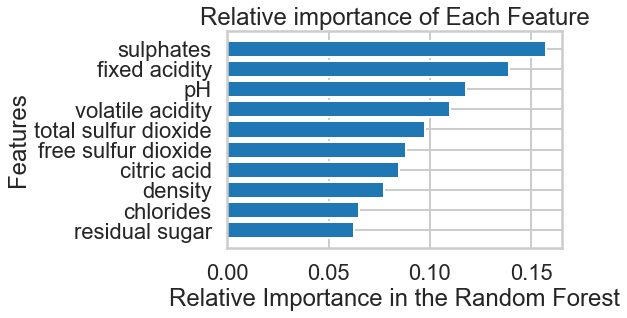

In [21]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [22]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'n_estimators': 30} 0.4263073909059311 {'mean_fit_time': array([0.03540411, 0.03460145, 0.03824639, 0.03965006, 0.04388323,
       0.04527903, 0.05131521, 0.05326619, 0.05524459, 0.05705709,
       0.06194973, 0.06748705, 0.07574763, 0.07744431, 0.09311886,
       0.08614144, 0.09693713, 0.09232383, 0.08716135, 0.09512119,
       0.0945097 , 0.0945837 , 0.09933348, 0.10054579, 0.09898539,
       0.11872177, 0.11528549, 0.12187505, 0.12485733, 0.11933384,
       0.12062473, 0.13011742, 0.13065724, 0.13262792, 0.12438745,
       0.14151454, 0.14856181, 0.14819083, 0.15379715, 0.16309948,
       0.16154513, 0.15875497, 0.15737076, 0.16194892, 0.16159191,
       0.1729754 , 0.16200867, 0.18473644, 0.17392802, 0.20254917]), 'std_fit_time': array([0.00427452, 0.00143507, 0.00344276, 0.00111321, 0.0030249 ,
       0.00048871, 0.00282014, 0.00264309, 0.00174475, 0.00097642,
       0.00205832, 0.00766193, 0.00766722, 0.01324808, 0.00381797,
       0.00969081, 0.0107186 , 0.00557522, 0.007

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 4, 'n_estimators': 47} 0.4353075872971135 {'mean_fit_time': array([0.03193316, 0.03784051, 0.03253956, 0.03135314, 0.03390946,
       0.03730021, 0.0358417 , 0.03470664, 0.03783288, 0.03611879,
       0.03510652, 0.03629804, 0.03833885, 0.0512116 , 0.04308786,
       0.04009929, 0.05405569, 0.04767194, 0.04476862, 0.04637904,
       0.05198245, 0.05455389, 0.04906821, 0.04846635, 0.05026512,
       0.05275779, 0.05524845, 0.06423001, 0.0700202 , 0.06901217,
       0.04644599, 0.05979023, 0.06013122, 0.05743113, 0.04727349,
       0.05404258, 0.05486083, 0.05166306, 0.05524688, 0.05665202,
       0.06322417, 0.0574451 , 0.06336045, 0.06519074, 0.0645391 ,
       0.06761637, 0.06522307, 0.06382775, 0.07539663, 0.06881628,
       0.07020955, 0.06931434, 0.07698345, 0.08177037, 0.07793832,
       0.07641087, 0.08441687, 0.08377671, 0.08756576, 0.08416214,
       0.06402855, 0.0708097 , 0.0715117 , 0.06736088, 0.07178631,
       0.07260504, 0.09061623, 0.07928662, 0.08578

Accuracy on training data: 0.98
Accuracy on test data:     0.89
[[535  16]
 [ 55  34]]
########################################################


In [24]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
# your code here
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]


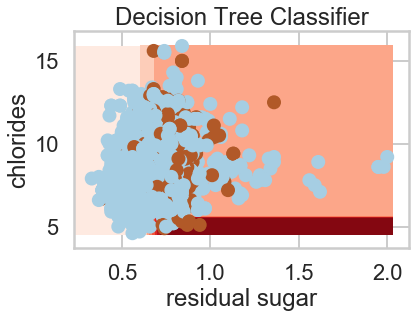

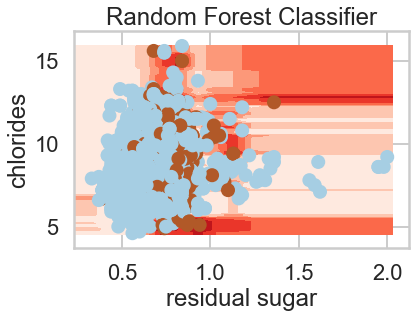

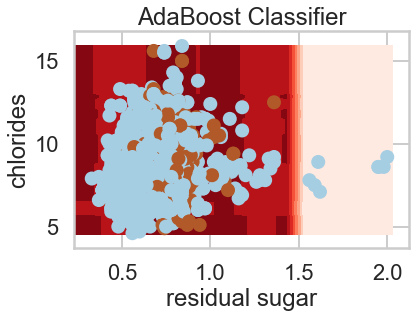

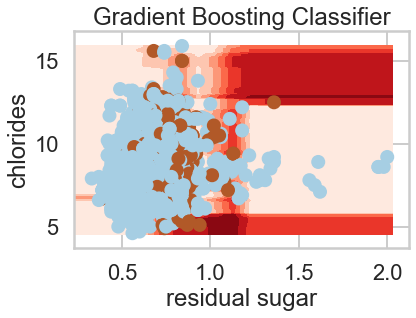

In [25]:
X_imp = df[df.columns[imp_cols]].values
Y = df.target.values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(4):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)